In [3]:
#import packages 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Milestone Project 
## Asma Akhtar 
### The Student Health Data consists of information regarding the health risks faced by college students engaged in academic and entrepreneurial activities. This data is organized for machine learning to predict health issues such as stress, physical strain, and mental well-being.

# Read Dataset

In [6]:
# Read in the data files
datafile="studenthealthdata.csv"
df=pd.read_csv(datafile,index_col=0)
#Display data 
df

,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
Student_ID,,,,,,,,,,,,,
1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate
2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate
3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate
4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High
5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,23,F,68.185217,126.031324,69.156288,8.318278,6.841725,Moderate,Moderate,Stressed,30.554113,9.491591,Moderate
997,18,F,77.720216,100.627116,75.569051,6.295881,4.152130,High,Poor,Happy,29.285850,22.819961,High
998,24,M,85.313237,124.362792,91.817614,2.896868,9.253887,Moderate,Good,Happy,15.330941,19.010784,Moderate


### Describing the data

In [8]:
#Describes the numeric columns
df.describe()

,Age,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Study_Hours,Project_Hours
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.9600,70.101863,119.835380,79.854756,5.483909,5.361601,30.227037,14.887368
std,2.0036,9.544663,14.604307,9.641699,2.596108,2.550382,10.341060,4.888624
min,18.0000,50.000000,90.000000,60.000000,1.008491,1.002186,5.000000,0.000000
25%,19.0000,63.347970,109.386868,73.115420,3.270567,3.172409,23.262704,11.573503
50%,21.0000,70.330916,120.051654,79.651738,5.368891,5.234889,30.432767,14.765873
75%,23.0000,76.425149,130.397799,86.535640,7.674233,7.471178,37.245193,18.159167
max,24.0000,99.650104,165.929204,107.659796,9.994153,9.964115,60.000000,32.720325


# Displaying the column names from the dataset

In [10]:
#Columns names in the dataset
df.columns

Index(['Age', 'Gender', 'Heart_Rate', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Stress_Level_Biosensor',
       'Stress_Level_Self_Report', 'Physical_Activity', 'Sleep_Quality',
       'Mood', 'Study_Hours', 'Project_Hours', 'Health_Risk_Level'],
      dtype='object')

# Number of rows and columns of the dataset

In [12]:
##Displaying the number of rows and columns in the dataset
df.shape

(1000, 13)

# datatype of the dataset (object, integer,...)

In [14]:
#data type of each column 
df.dtypes

Age                           int64
Gender                       object
Heart_Rate                  float64
Blood_Pressure_Systolic     float64
Blood_Pressure_Diastolic    float64
Stress_Level_Biosensor      float64
Stress_Level_Self_Report    float64
Physical_Activity            object
Sleep_Quality                object
Mood                         object
Study_Hours                 float64
Project_Hours               float64
Health_Risk_Level            object
dtype: object

# Displaying the first 5 rows of the dataset

In [16]:
#First 5 rows of the dataset
df.head()

,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
Student_ID,,,,,,,,,,,,,
1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate
2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate
3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate
4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High
5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate


# Displaying the last 5 rows of the dataset

In [18]:
#Last 5 rows of the dataset
df.tail()

,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
Student_ID,,,,,,,,,,,,,
996,23,F,68.185217,126.031324,69.156288,8.318278,6.841725,Moderate,Moderate,Stressed,30.554113,9.491591,Moderate
997,18,F,77.720216,100.627116,75.569051,6.295881,4.152130,High,Poor,Happy,29.285850,22.819961,High
998,24,M,85.313237,124.362792,91.817614,2.896868,9.253887,Moderate,Good,Happy,15.330941,19.010784,Moderate
999,21,M,79.212477,106.370246,77.218808,3.130484,2.205774,Low,Poor,Neutral,31.921143,9.159565,Low
1000,23,F,64.576277,109.274277,76.628119,6.652274,7.043606,Moderate,Good,Happy,30.944070,20.068335,Moderate


# Displaying random 5 rows from the dataset

In [20]:
#Random sample of the dataset
df.sample()

,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
Student_ID,,,,,,,,,,,,,
487,20,F,63.49587,100.51325,71.622906,5.484997,2.426825,Moderate,Good,Neutral,53.83457,13.342994,Moderate


# Details of the dataset

In [22]:
#Number of columns, names, non-null values, datatype for each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   int64  
 1   Gender                    1000 non-null   object 
 2   Heart_Rate                1000 non-null   float64
 3   Blood_Pressure_Systolic   1000 non-null   float64
 4   Blood_Pressure_Diastolic  1000 non-null   float64
 5   Stress_Level_Biosensor    1000 non-null   float64
 6   Stress_Level_Self_Report  1000 non-null   float64
 7   Physical_Activity         1000 non-null   object 
 8   Sleep_Quality             1000 non-null   object 
 9   Mood                      1000 non-null   object 
 10  Study_Hours               1000 non-null   float64
 11  Project_Hours             1000 non-null   float64
 12  Health_Risk_Level         1000 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 109.4+ KB


# Now that we have explored the dataset now we will clean the data set

## Check for Missing Values

In [25]:
df.isna().sum()  # Count missing values in each column

Age                         0
Gender                      0
Heart_Rate                  0
Blood_Pressure_Systolic     0
Blood_Pressure_Diastolic    0
Stress_Level_Biosensor      0
Stress_Level_Self_Report    0
Physical_Activity           0
Sleep_Quality               0
Mood                        0
Study_Hours                 0
Project_Hours               0
Health_Risk_Level           0
dtype: int64

## Detecting and handling Outliers

In [27]:
df.columns  # displaying column names 

Index(['Age', 'Gender', 'Heart_Rate', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Stress_Level_Biosensor',
       'Stress_Level_Self_Report', 'Physical_Activity', 'Sleep_Quality',
       'Mood', 'Study_Hours', 'Project_Hours', 'Health_Risk_Level'],
      dtype='object')

## Renaming some of the columns to make it shorter for easier reading 

In [29]:
# Renaming specific columns 
df.rename(columns={  
    'Blood_Pressure_Systolic': 'BP_SYST',
    'Blood_Pressure_Diastolic': 'BP_DIAST',
    'Stress_Level_Biosensor': 'Stress_Level_BioS',
    'Stress_Level_Self_Report': 'Stress_Level_SR',
    'Study_Hours': 'Study_HR',
    'Project_Hours': 'Project_HR'
}, inplace=True)

# Check columns after renaming
print("Columns after renaming:")
print(df.columns)


Columns after renaming:
Index(['Age', 'Gender', 'Heart_Rate', 'BP_SYST', 'BP_DIAST',
       'Stress_Level_BioS', 'Stress_Level_SR', 'Physical_Activity',
       'Sleep_Quality', 'Mood', 'Study_HR', 'Project_HR', 'Health_Risk_Level'],
      dtype='object')


## Detecting and handling outliers using the IQR method. 
### Printing out the numbers of outliers and dataset after handling outliers. 

In [31]:
# Function to detect and handle outliers using IQR
def handle_outliers(column):
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Display outliers.... printing the first 5 outliers
    print(f"Outliers in {column}:")
    print(outliers.head())  # Print the first 5 outliers for overload
    print(f"Total number of outliers in {column}: {outliers.shape[0]}")
    
    # cap outliers to the boundary values
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Updated list of numerical columns with correct names
numerical_columns = ['Heart_Rate', 'BP_SYST', 'BP_DIAST', 
                     'Stress_Level_BioS', 'Stress_Level_SR', 'Study_HR', 'Project_HR']

# Apply outlier handling to the updated numerical columns
for col in numerical_columns:
    handle_outliers(col)

# check the dataset after handling outliers:
print("\nDataset after handling outliers:")
print(df[numerical_columns].describe())


Outliers in Heart_Rate:
            Age Gender  Heart_Rate     BP_SYST   BP_DIAST  Stress_Level_BioS  \
Student_ID                                                                     
199          19      M   99.650104  152.812332  81.798311           7.665972   
276          21      M   99.377528   98.811964  74.927286           6.611548   
770          24      F   96.631824  142.695139  63.073184           3.940650   
942          22      M   96.875344  111.297845  69.414963           1.630618   
980          24      F   97.308672  135.537379  78.658548           8.664233   

            Stress_Level_SR Physical_Activity Sleep_Quality      Mood  \
Student_ID                                                              
199                4.733622          Moderate      Moderate   Neutral   
276                3.888419          Moderate      Moderate   Neutral   
770                3.479020          Moderate      Moderate     Happy   
942                6.891591          Moderate     

## Removing any extra spaces with a single space

In [33]:
# List of categorical columns to check for extra spaces
categorical_columns = ['Gender', 'Physical_Activity', 'Sleep_Quality', 'Mood', 'Health_Risk_Level']

# Check and remove extra spaces in categorical columns
for col in categorical_columns:
    print(f"Original unique values in {col}:")
    print(df[col].unique())  # Print original unique values
    print("-" * 50)

    # Removing any leading spaces and replacing multiple spaces with a single space
    df[col] = df[col].str.strip()  # Removing leading spaces
    df[col] = df[col].str.replace(r'\s+', ' ', regex=True)  # Replacing multiple spaces with a single space

    print(f"Cleaned unique values in {col}:")
    print(df[col].unique())  # Printing cleaned unique values
    print("-" * 50)

# printing the cleaned data for categorical columns
print("Cleaned categorical data (head):")
print(df[categorical_columns].head())


Original unique values in Gender:
['M' 'F']
--------------------------------------------------
Cleaned unique values in Gender:
['M' 'F']
--------------------------------------------------
Original unique values in Physical_Activity:
['High' 'Moderate' 'Low']
--------------------------------------------------
Cleaned unique values in Physical_Activity:
['High' 'Moderate' 'Low']
--------------------------------------------------
Original unique values in Sleep_Quality:
['Moderate' 'Good' 'Poor']
--------------------------------------------------
Cleaned unique values in Sleep_Quality:
['Moderate' 'Good' 'Poor']
--------------------------------------------------
Original unique values in Mood:
['Happy' 'Stressed' 'Neutral']
--------------------------------------------------
Cleaned unique values in Mood:
['Happy' 'Stressed' 'Neutral']
--------------------------------------------------
Original unique values in Health_Risk_Level:
['Moderate' 'High' 'Low']
---------------------------------

# Checking for any duplicates that might be present in the data.

In [35]:
# Check how many duplicates are present in the DataFrame
duplicates_before = df.duplicated().sum()
print(f"Number of duplicate rows before removing: {duplicates_before}")

# Remove duplicates if any
df_cleaned = df.drop_duplicates()

# Check how many rows were removed 
duplicates_removed = len(df) - len(df_cleaned)
print(f"Number of duplicate rows removed: {duplicates_removed}")

# check the cleaned DataFrame
print(f"Number of rows after removing duplicates: {len(df_cleaned)}")

Number of duplicate rows before removing: 0
Number of duplicate rows removed: 0
Number of rows after removing duplicates: 1000


## Saving new data set as CSV

#save our data for csv file 
df.to_csv("Cleandataforstudenthealthdata.csv")

# Now that our data is cleaned we can start performing analysis

## 1. How does physical activity level (Low, Moderate, High) correlate with self-reported stress levels (Stress_Level_Self_Report)? 

In [40]:
student_health_data=pd.read_csv("Cleandataforstudenthealthdata.csv")


In [41]:
selected_columns=student_health_data[['Physical_Activity', 'Stress_Level_SR']]
selected_columns

,Physical_Activity,Stress_Level_SR
0,High,9.028669
1,Moderate,5.819697
2,Low,5.892360
3,High,6.884001
4,Moderate,4.483450
...,...,...
995,Moderate,6.841725
996,High,4.152130
997,Moderate,9.253887
998,Low,2.205774


In [42]:
# Use ordinal numbers to map physical activity
activity_mapping = {'Low': 1, 'Moderate': 2, 'High': 3} # assigning ordinal values to the physical activity
student_health_data['Physical_Activity_Ordinal'] = student_health_data['Physical_Activity'].map(activity_mapping)  # creating new column for physical avtivity

# Calculate the correlation between Physical_Activity_Ordinal and Stress_Level_SR
correlation = student_health_data[['Physical_Activity_Ordinal', 'Stress_Level_SR']].corr().iloc[0, 1] # finding the correlation value between the new physical activity column and stress level SR

# Print the output
print(f"Correlation between Physical Activity Level and Self-Reported Stress: {correlation:.2f}")


Correlation between Physical Activity Level and Self-Reported Stress: -0.04


In [43]:
# focus on physical activity ordinal and stress level SR for visualization 
activity_stress_level=student_health_data[['Physical_Activity_Ordinal', 'Stress_Level_SR']]
activity_stress_level # display data

,Physical_Activity_Ordinal,Stress_Level_SR
0,3,9.028669
1,2,5.819697
2,1,5.892360
3,3,6.884001
4,2,4.483450
...,...,...
995,2,6.841725
996,3,4.152130
997,2,9.253887
998,1,2.205774


In [44]:
# generate correlation matrix for the two variables 
corr_matrix=activity_stress_level.corr()
corr_matrix  # dispaly data 


,Physical_Activity_Ordinal,Stress_Level_SR
Physical_Activity_Ordinal,1.000000,-0.040846
Stress_Level_SR,-0.040846,1.000000


## Ploting 

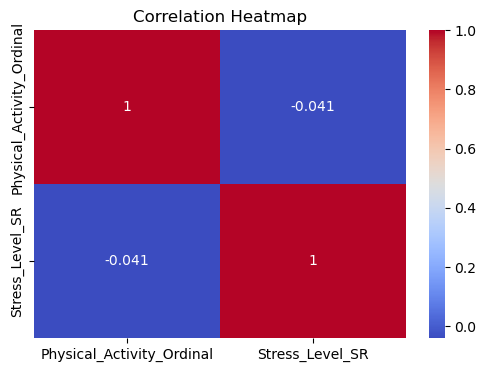

In [46]:
columns = ['Physical_Activity_Ordinal', 'Stress_Level_SR']
# Create a heatmap
plt.figure(figsize=(6, 4))  # selecting the size of the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') #creating heatmap to display the correlation mix with annotations
plt.title("Correlation Heatmap")  # adding title
plt.show() # show data



# There is a very slight negative connection (-0.04) between self-reported stress levels and physical activity levels. This indicates that self-reported stress tends to slightly decline as levels of physical activity rise. The correlation value is quite near to zero, though, indicating that the relationship is weak and possibly has little to no impact on the self-reported stress levels in this dataset.

### 2. How do different levels of sleep quality (Poor, Moderate, Good) correlate with self-reported stress levels (Stress_Level_Self_Report)?

In [49]:
# Map Sleep_Quality to numerical values
sleep_map = {'Poor': 1, 'Moderate': 2, 'Good': 3}  # converting into numerical values
student_health_data['Sleep_Quality_Ordinal'] = student_health_data['Sleep_Quality'].map(sleep_map)  # creating new column for sleep quality

# Calculate the correlation between Sleep Quality and Stress Level
correlation_sleep_stress = student_health_data[['Sleep_Quality_Ordinal', 'Stress_Level_SR']].corr().iloc[0, 1] #select the new column and stress level SR to calculate correlation. 

# Display the correlation result
print(f"Correlation between Sleep Quality and Self-Reported Stress: {correlation_sleep_stress:.2f}")


Correlation between Sleep Quality and Self-Reported Stress: -0.03


In [50]:
# Extract selected columns related to sleep quality and stress level from the student_health_data DataFrame
activity_sleep_levels=student_health_data[['Sleep_Quality_Ordinal', 'Stress_Level_SR']]

In [51]:
activity_sleep_levels # show data 

,Sleep_Quality_Ordinal,Stress_Level_SR
0,2,9.028669
1,3,5.819697
2,2,5.892360
3,1,6.884001
4,1,4.483450
...,...,...
995,2,6.841725
996,1,4.152130
997,3,9.253887
998,1,2.205774


In [52]:
# generate correlation matrix for the two variables 
corr_matrix=activity_sleep_levels.corr()
corr_matrix #display results 

,Sleep_Quality_Ordinal,Stress_Level_SR
Sleep_Quality_Ordinal,1.000000,-0.029302
Stress_Level_SR,-0.029302,1.000000


## Ploting 

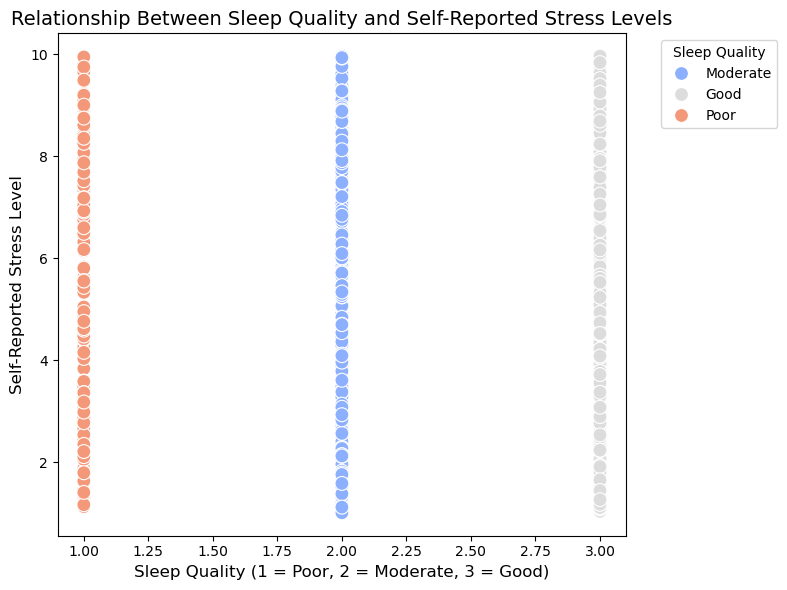

In [54]:
# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=student_health_data, x='Sleep_Quality_Ordinal', y='Stress_Level_SR', hue='Sleep_Quality', palette='coolwarm', s=100)

# Add labels and title
plt.title("Relationship Between Sleep Quality and Self-Reported Stress Levels", fontsize=14)
plt.xlabel("Sleep Quality (1 = Poor, 2 = Moderate, 3 = Good)", fontsize=12)
plt.ylabel("Self-Reported Stress Level", fontsize=12)

# Move the legend outside the plot
plt.legend(title='Sleep Quality', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()


### Self-reported stress levels and sleep quality have a weak negative correlation of -0.03, which shows that there is no major or significant relationship between the two variables. In other words, this dataset suggests that improving sleep quality might not always result in a noticeable decrease in stress levels.

### 3. How do self-reported moods (Happy, Neutral, Stressed) correlate with self-reported stress levels? 

In [57]:
# Map moods to numerical values
mood_map = {'Happy': 3, 'Neutral': 2, 'Stressed': 1}
student_health_data['Mood_Ordinal'] = student_health_data['Mood'].map(mood_map)

# Calculate correlation between Mood (Ordinal) and Stress Level
correlation_mood_stress = student_health_data[['Mood_Ordinal', 'Stress_Level_SR']].corr().iloc[0, 1]

# Display the correlation result
print(f"Correlation between Self-Reported Mood and Self-Reported Stress Level: {correlation_mood_stress:.2f}")



Correlation between Self-Reported Mood and Self-Reported Stress Level: 0.02


In [58]:
moods_activity=student_health_data[['Mood_Ordinal', 'Stress_Level_SR']]
moods_activity

,Mood_Ordinal,Stress_Level_SR
0,3,9.028669
1,1,5.819697
2,3,5.892360
3,3,6.884001
4,3,4.483450
...,...,...
995,1,6.841725
996,3,4.152130
997,3,9.253887
998,2,2.205774


In [59]:
# generate correlation matrix for the two variables 
corr_matrix=moods_activity.corr()
corr_matrix # show matrix

,Mood_Ordinal,Stress_Level_SR
Mood_Ordinal,1.000000,0.019973
Stress_Level_SR,0.019973,1.000000


## Ploting 

In [61]:
# Grouping the student_health_data by 'Mood' and calculating the mean of 'Stress_Level_SR' for each group
mean_stress_by_mood = student_health_data.groupby('Mood')['Stress_Level_SR'].mean().reset_index()
# Display the result which shows the average stress levels for each mood
mean_stress_by_mood

,Mood,Stress_Level_SR
0,Happy,5.453529
1,Neutral,5.274956
2,Stressed,5.357719


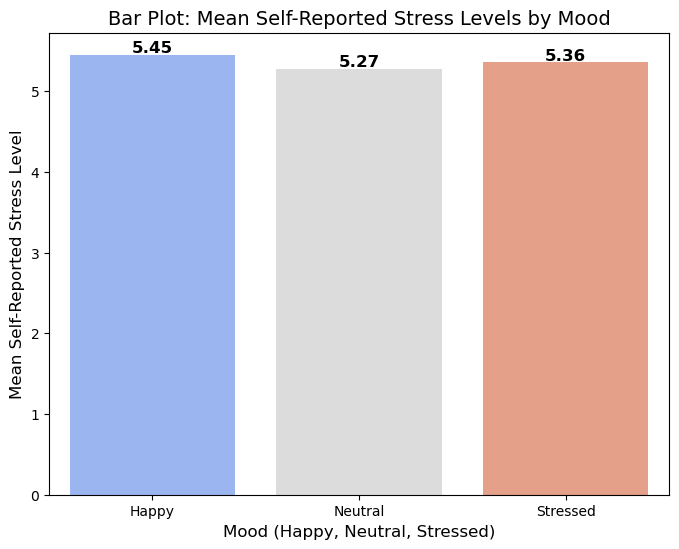

In [62]:
# Create a bar plot to view the mean stress level by mood
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Mood', y='Stress_Level_SR', data=mean_stress_by_mood, hue='Mood', palette='coolwarm')

# Add numeric labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Label with the numeric value (formatted to 2 decimal places)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position label at the top of the bar
                ha='center', va='center', fontsize=12, color='black', fontweight='bold', xytext=(0, 5), textcoords='offset points')

# Add title and labels
plt.title("Bar Plot: Mean Self-Reported Stress Levels by Mood", fontsize=14)
plt.xlabel("Mood (Happy, Neutral, Stressed)", fontsize=12)
plt.ylabel("Mean Self-Reported Stress Level", fontsize=12)

# Show the plot
plt.show()


# There is a 0.02 association between self-reported stress levels and mood (Happy, Neutral, Stressed). This suggests that the two variables have a very weak positive association. This basically indicates that there is hardly any relationship between stress levels and mood in this dataset.